In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime,timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read file from github
df = pd.read_excel(r"https://github.com/r-nirmala/Industrial-Copper-Modeling/raw/main/Data/Copper_Set.xlsx")
df.sample(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
78401,336E696C-26F7-4A85-B4BD-F9B5C1D5993E,20201212.0,28.363653,30206203.0,26.0,Revised,W,41.0,1.0,1250.0,NaN,611993,20210401.0,1026.00
104982,9F1782BD-DBE0-4D36-A59A-BBA6C8503C05,20201112.0,29.097249,30165992.0,77.0,Lost,S,10.0,1.5,1000.0,FEPA000320015465000,628377,20210201.0,649.00
85381,BA8D5EBA-8141-4ACD-92BD-A63B7B3CA893,20201204.0,9.7942,30196884.0,84.0,Won,W,10.0,2.5,1250.0,NaN,1668701718,20210101.0,769.57


In [ ]:
df['width'].max()

2990.0

In [ ]:
#counts unique values for each column
for i in df.columns:
    print(i,':', df[i].nunique())

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [ ]:
#to see null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [ ]:
#count null values
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [ ]:
#convert datatypes and date-time format
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors='coerce')
df['item_date_1'] = pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce').dt.date
df['delivery_date_1'] = pd.to_datetime(df['delivery date'],format='%Y%m%d',errors='coerce').dt.date
df.sample(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
121166,73E53171-C62F-434B-99D1-0765B8DC2AE7,20201019.0,307.883233,30287258.0,27.0,Not lost for AM,S,10.0,0.65,978.0,130614939B2F60HEA,611993,20210101.0,761.00,2020-10-19,2021-01-01
70299,899D8867-6EE3-405E-B12E-F149E8DB3F8D,20210105.0,2.876661,30201846.0,25.0,Won,W,10.0,2.00,900.0,8000-0100-200900,628377,20210401.0,815.00,2021-01-05,2021-04-01
80615,66042F8D-28C7-42BA-A57E-8D9BCABFE00D,20201210.0,53.342901,30267349.0,84.0,Lost,W,10.0,2.00,1060.0,8X54A100O6FSA,164141591,20210101.0,835.11,2020-12-10,2021-01-01


In [ ]:
#making material ref column's unwanted values to nan
df['material_ref']=df['material_ref'].apply(lambda x: np.nan if str(x).startswith('0000') else x)
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [ ]:
df.isnull().sum()

id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery_date_1         3
dtype: int64

In [ ]:
#materi ref column has more null values. remove that column and id column
df.drop(columns=['id','material_ref'],inplace=True)
df.sample(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
53578,20210125.0,67.774417,30153920.0,25.0,Not lost for AM,W,41.0,1.5,1100.0,1668701718,20210401.0,960.00,2021-01-25,2021-04-01
33141,20210224.0,90.725000,30267349.0,84.0,Won,W,10.0,0.7,1250.0,1668701718,20210401.0,1077.34,2021-02-24,2021-04-01
41392,20210210.0,29.544261,30198074.0,26.0,Not lost for AM,S,15.0,15.0,1500.0,1671863738,20210701.0,963.00,2021-02-10,2021-07-01


In [ ]:
#descriptive statistics of df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [ ]:
#quantity tons and selling price values below 0. Convert them to null.
df['quantity tons']=df['quantity tons'].apply(lambda x: np.nan if (x<=0) else x)
df['selling_price']=df['selling_price'].apply(lambda x: np.nan if (x<=0) else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181668.0,5.875066e+03,2.349107e+06,1.000000e-05,1.097122e+01,3.036501e+01,6.716134e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181665.0,1.918124e+03,3.318020e+05,1.000000e-01,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [ ]:
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery_date_1     3
dtype: int64

In [ ]:
df.dtypes

item_date          float64
quantity tons      float64
customer           float64
country            float64
status              object
item type           object
application        float64
thickness          float64
width              float64
product_ref          int64
delivery date      float64
selling_price      float64
item_date_1         object
delivery_date_1     object
dtype: object

In [ ]:
#handle null values using median,mode
#median - middle value in dataset, mode - value that appears most frequently in dataset

# object datatype using mode
df['item_date'].fillna(df['item_date'].mode().iloc[0],inplace=True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0],inplace=True)
df['status'].fillna(df['status'].mode().iloc[0],inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0],inplace=True)
df['delivery_date_1'].fillna(df['delivery_date_1'].mode().iloc[0],inplace=True)


In [ ]:
#numerical datatype using median
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [ ]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery_date_1    0
dtype: int64

In [ ]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [ ]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [ ]:
# convert categorical data into numerical data - using map and ordinal encoder methods

df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [ ]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8])

In [ ]:
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [ ]:
#check for null and describe function finally
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery_date_1    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


**Skewness Handling - Log Transformation**

In [ ]:
#detecting skewness in columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(13,3))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)



In [ ]:
columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']


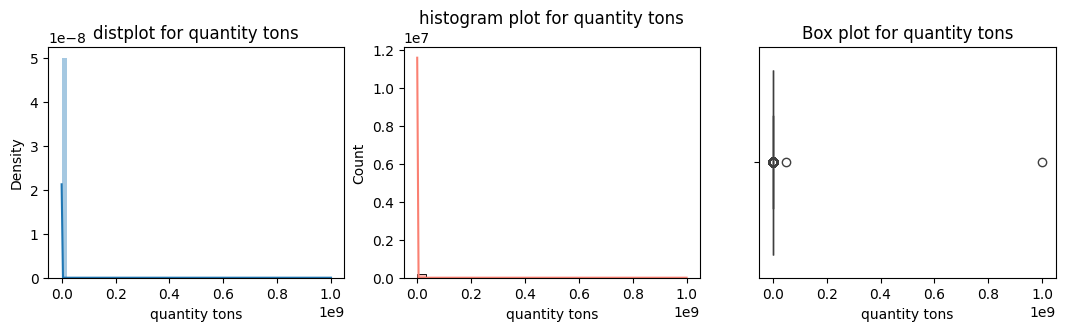

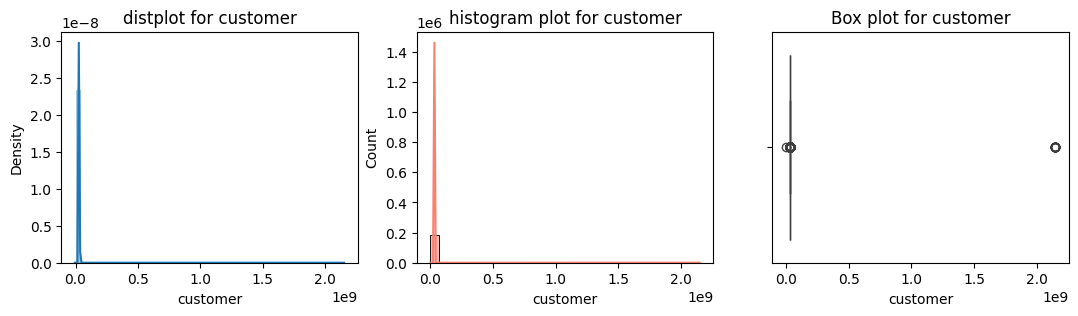

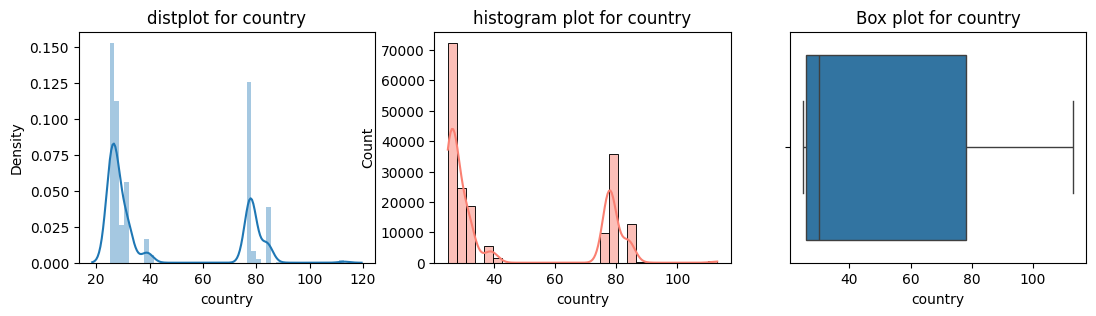

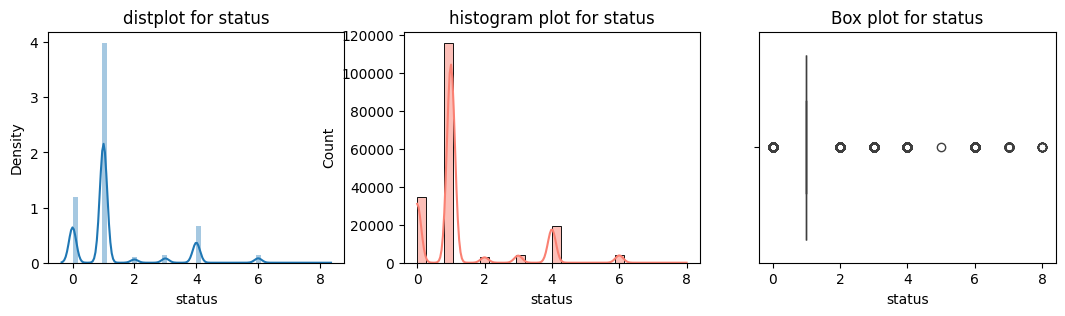

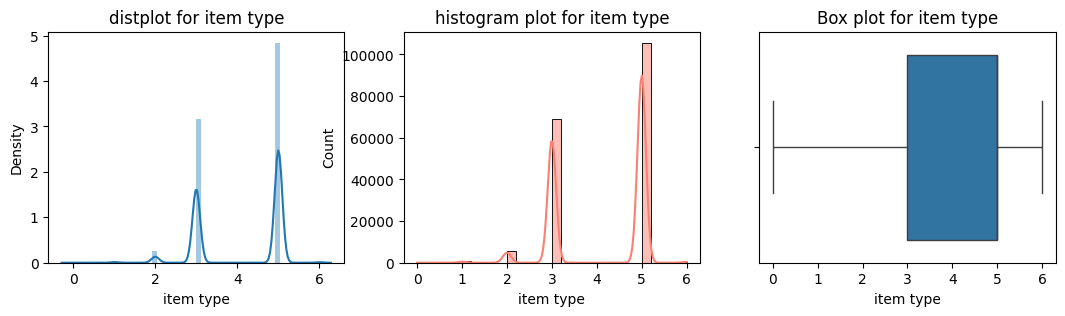

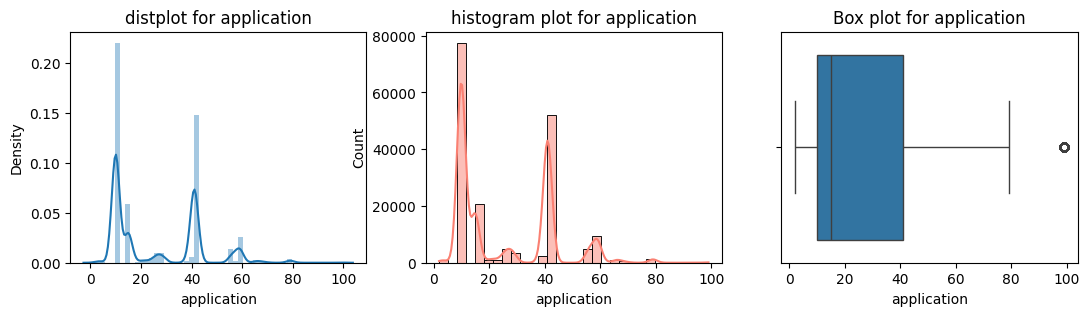

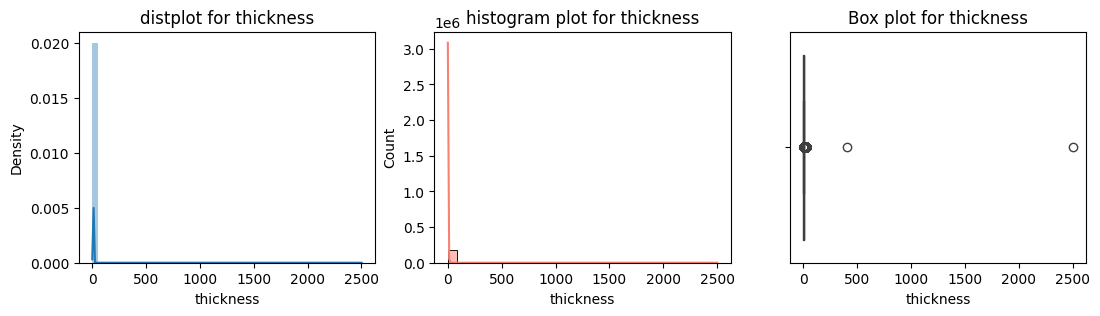

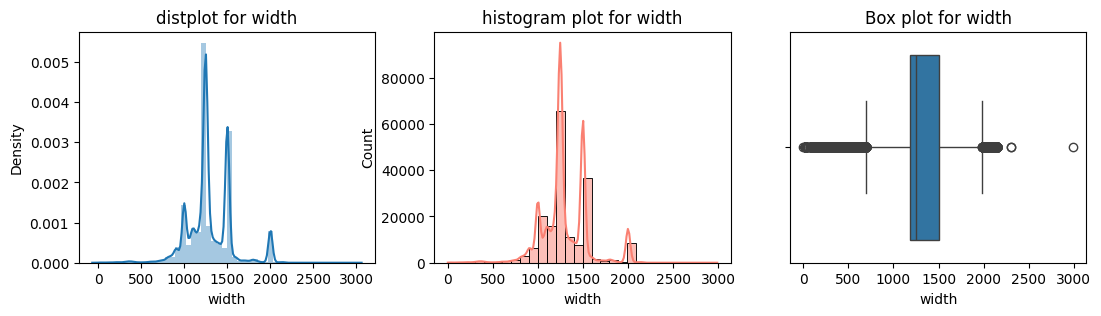

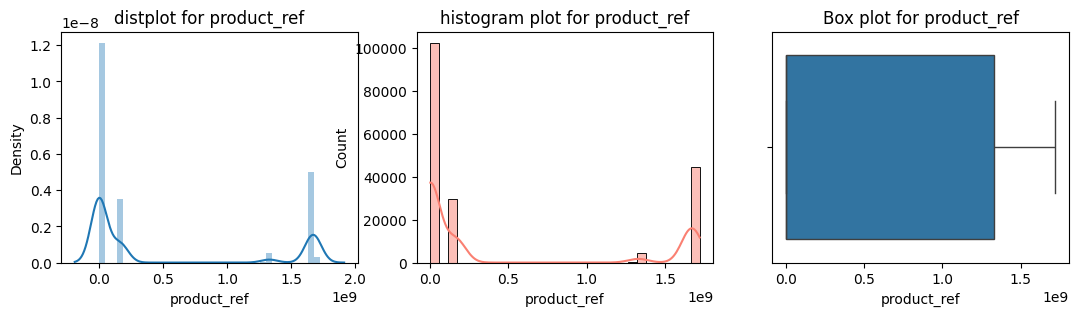

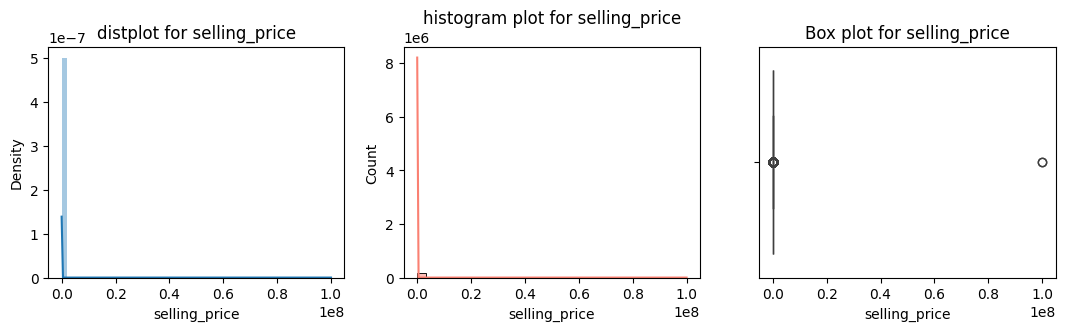

In [ ]:
for i in columns:
  plot(df,i)

In [ ]:
#Skewed columns - quantity tons,customer,thickness,selling_price
#use log transformation method to reduce skewness
df1 = df.copy()


In [ ]:
df1['quantity_tons_log']=np.log(df['quantity tons'])
df1['customer_log']=np.log(df['customer'])
df1['thickness_log']=np.log(df['thickness'])
df1['selling_price_log']=np.log(df['selling_price'])

In [ ]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

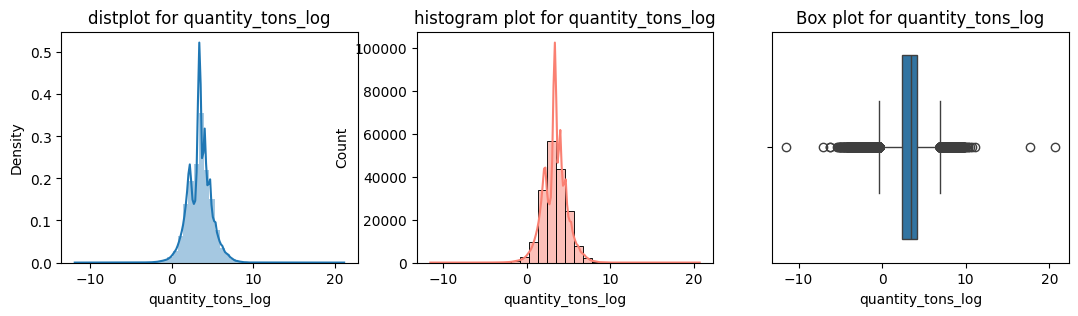

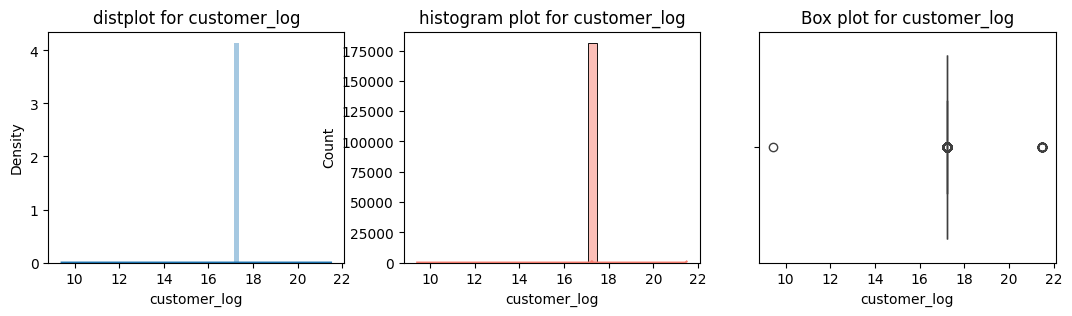

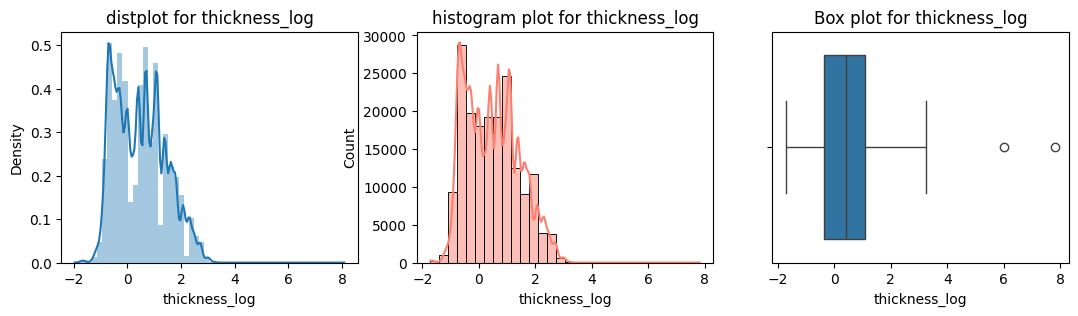

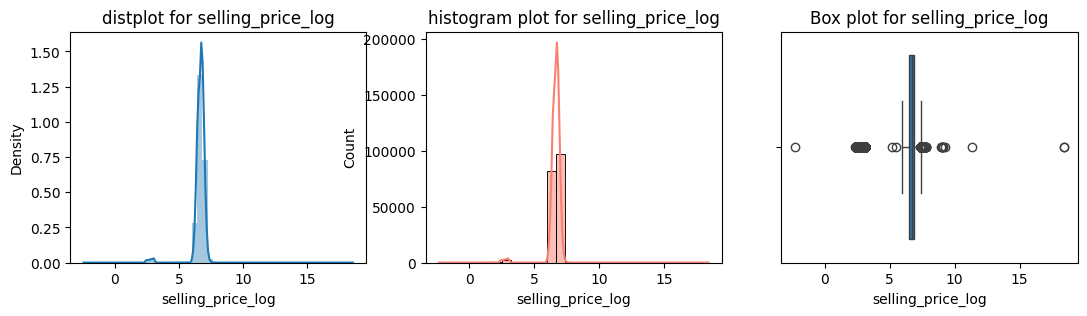

In [ ]:
#check skewness after log trans. by plots
columns_log = ['quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log']
for i in columns_log:
  plot(df1,i)

**Outliers Handling - Interquartile Range(IQR) Method**

In [ ]:
df2 = df1.copy()
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [ ]:
# Using IQR and clip() methods to handle the outliers
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)


In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [ ]:
df2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [ ]:
outlier_columns= ['quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log','width','application']
for i in outlier_columns:
  outlier(df2,i)

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.560516e+01,1.771817e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


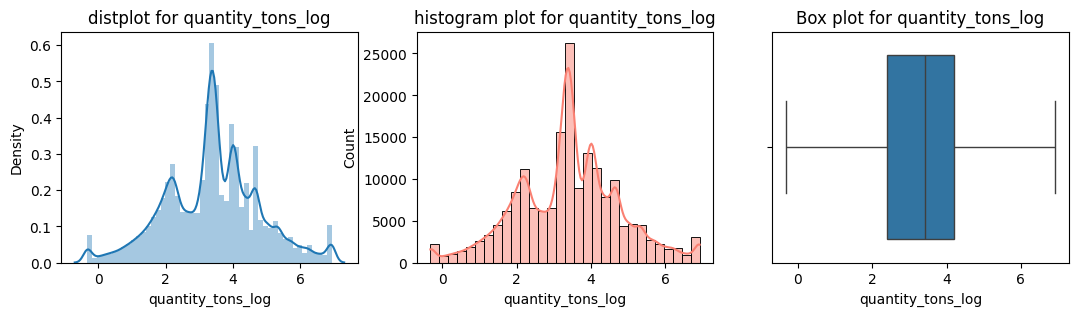

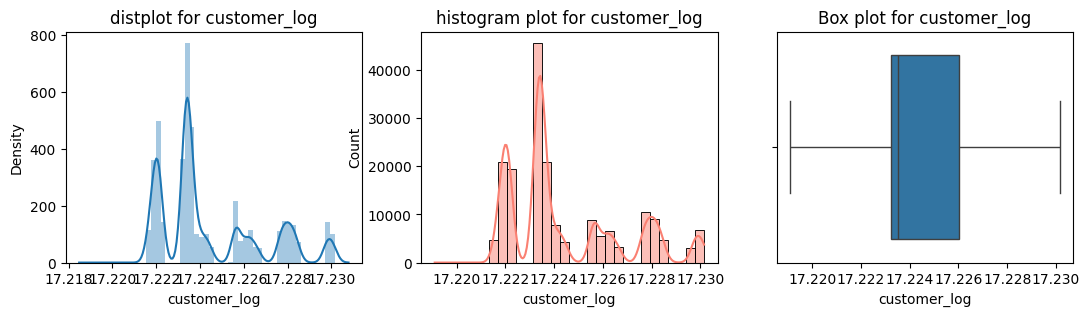

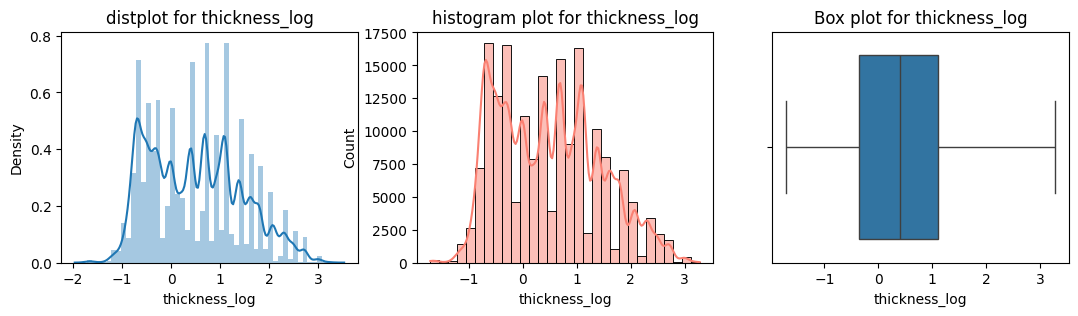

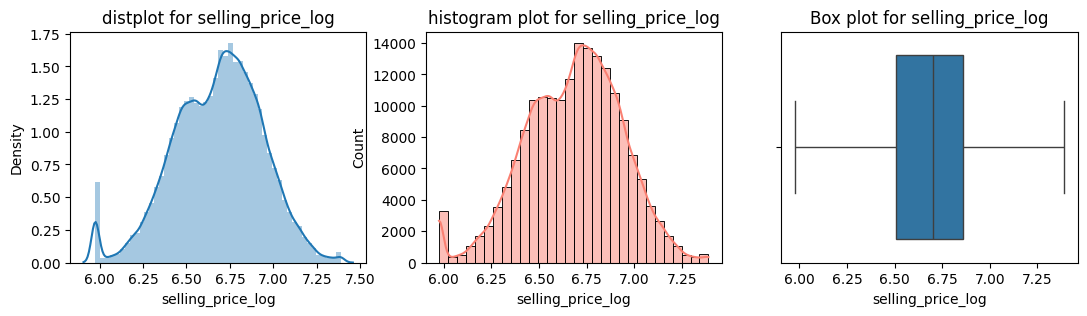

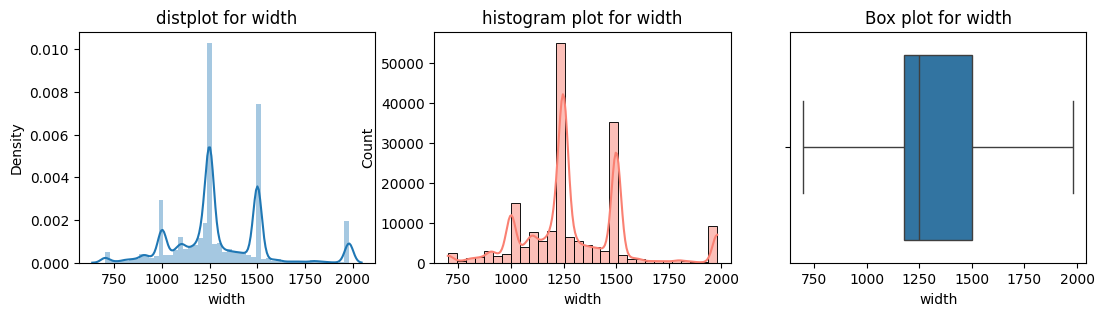

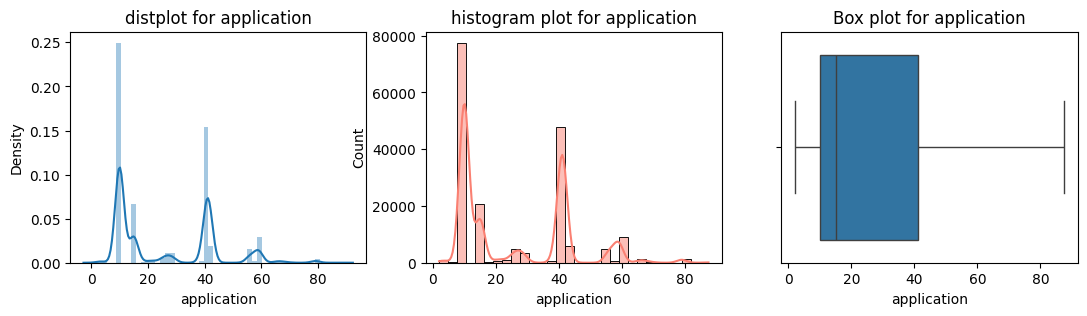

In [ ]:
for i in outlier_columns:
  plot(df2,i)

In [ ]:
# Droping the unwanted columns - quantity tons,customer,thickness,selling_price,
# since we have log columns of all these.

df3= df2.drop(columns=["quantity tons","customer","thickness","selling_price"])
df3.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [ ]:
#check the data types
df3.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery_date_1       object
quantity_tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

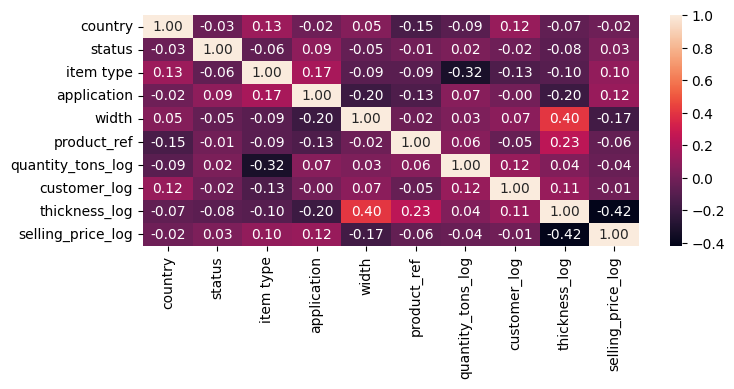

In [ ]:
# Verification of highly correlated columns using Heatmap. If any columns correlation value >= 0.7 (absolute value), drop the columns.
corr = df3.drop(columns=['item_date','delivery date','item_date_1','delivery_date_1']).corr()
plt.figure(figsize=(8,3))
sns.heatmap(corr, annot= True, fmt="0.2f")
plt.show()


The highest value is (0.4 or -0.42). So, no columns are highly correlated and no need to drop any columns.
     

# Wrong Delivery date Handling

In [ ]:
#In data, delivery date precedes item date. It should be changed
df4 = df3.copy()
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [ ]:
df4.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery_date_1       object
quantity_tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [ ]:
#converting object datatypes to datetime
df4['item_date_1']=pd.to_datetime(df4['item_date_1'])
df4['delivery_date_1']=pd.to_datetime(df4['delivery_date_1'])


In [ ]:
df4.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [ ]:
#identify date difference bet. delivery date and item date
df4['date_differ']=(df4['delivery_date_1'] - df4['item_date_1']).dt.days
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31


In [ ]:
#-ve values in date differ. indicates delivery date precedes item date. So, we predict correct delivery date using ML algorithms.
#So,split item date_1 into day,month,year for prediction.
df4['item_date_day']=df4['item_date_1'].dt.day
df4['item_date_month']=df4['item_date_1'].dt.month
df4['item_date_year']=df4['item_date_1'].dt.year
df4.sample(3)


,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
66556,20210111.0,25.0,1,5.0,41.0,1240.0,611993,20210101.0,2021-01-11,2021-01-01,4.359651,17.223547,-0.385662,7.026427,-10,11,1,2021
69887,20210105.0,30.0,1,5.0,41.0,1364.0,611993,20210101.0,2021-01-05,2021-01-01,0.393462,17.221812,-0.765718,6.979155,-4,5,1,2021
33537,20210223.0,78.0,1,5.0,41.0,1500.0,640665,20210401.0,2021-02-23,2021-04-01,5.733142,17.222027,1.098612,6.678342,37,23,2,2021


In [ ]:
#seperating +ve value df and _ve value df based on date differ column
df4_pv = df4[df4['date_differ']>=0]
df4_pv.reset_index(drop=True,inplace=True)
df4_pv.sample(3)

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
68177,20201230.0,39.0,1,5.0,10.0,1200.0,1670798778,20210301.0,2020-12-30,2021-03-01,4.328338,17.228432,1.386294,6.587550,61,30,12,2020
93240,20201124.0,84.0,1,5.0,10.0,1250.0,164141591,20210101.0,2020-11-24,2021-01-01,3.033947,17.225580,-0.105361,6.682159,38,24,11,2020
147480,20200820.0,26.0,0,3.0,10.0,1284.0,164141591,20201201.0,2020-08-20,2020-12-01,5.557747,17.223707,0.916291,6.549651,103,20,8,2020


In [ ]:
df4_nv= df4[df4['date_differ']<0]
df4_nv.reset_index(drop=True,inplace=True)
df4_nv.sample(3)

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
10050,20200803.0,78.0,4,3.0,41.0,1500.0,611993,20200701.0,2020-08-03,2020-07-01,6.924734,17.221931,-0.287682,6.519147,-33,3,8,2020
15219,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,2.835126,17.228166,-0.328504,6.450470,-1,2,7,2020
10993,20200722.0,26.0,4,5.0,56.0,1100.0,1670798778,20200701.0,2020-07-22,2020-07-01,4.067078,17.224007,1.098612,6.313548,-21,22,7,2020


### Train the model with df4_pv(correct deliv.dates) dataframe and predict date difference for df4_nv(incorrect deliv.dates) dataframe

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from datetime import datetime,timedelta

In [ ]:
df4_pv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [ ]:
#find the best algorithm
def delivery_date(df, algorithm):
  x = df.drop(columns=['item_date_1', 'delivery_date_1','date_differ'],axis=1)
  y = df['date_differ']
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  model=algorithm().fit(x_train,y_train)
  y_pred = model.predict(x_test)

  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)

  metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1],
              'R2': r2,
              'Mean Absolute Error': mae,
              'Mean Squared Error': mse,
              'Root Mean Squared Error': rmse}

  return metrics

In [ ]:
print(delivery_date(df4_pv, DecisionTreeRegressor))
print(delivery_date(df4_pv, ExtraTreesRegressor))
print(delivery_date(df4_pv, RandomForestRegressor))
print(delivery_date(df4_pv, AdaBoostRegressor))
print(delivery_date(df4_pv, GradientBoostingRegressor))
print(delivery_date(df4_pv, XGBRegressor))


{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9996235142300214, 'Mean Absolute Error': 0.0074593060127442394, 'Mean Squared Error': 0.584272038172319, 'Root Mean Squared Error': 0.7643768953679323}
{'Algorithm': 'ExtraTreesRegressor', 'R2': 0.9999535592815726, 'Mean Absolute Error': 0.013780388367106607, 'Mean Squared Error': 0.07149032404191709, 'Root Mean Squared Error': 0.2673767455144839}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9999420201362328, 'Mean Absolute Error': 0.006987587956391761, 'Mean Squared Error': 0.08959209977954279, 'Root Mean Squared Error': 0.2993193942589467}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.7291391773889405, 'Mean Absolute Error': 16.944465708054572, 'Mean Squared Error': 412.02363198109714, 'Root Mean Squared Error': 20.298365253908926}
{'Algorithm': 'GradientBoostingRegressor', 'R2': 0.9871360837614762, 'Mean Absolute Error': 3.057113518113868, 'Mean Squared Error': 19.837867980163114, 'Root Mean Squared Error': 4.453972157542424}
{'Algorithm

In [ ]:
df4_pv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [ ]:
df4_nv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [ ]:
# Random Forest algorithm is low bias and reduce overfitting compared to others.
# Train the model with random forest algorithm

def RandomForest(train_df, test_df):
  #df4_pv data for training
  x= train_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"], axis=1)
  y= train_df["date_differ"]

  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= RandomForestRegressor().fit(x_train, y_train)

  #df4_nv data for prediction
  data= test_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"],axis=1)

  y_pred=model.predict(data)

  return y_pred


In [ ]:
date_difference = RandomForest(df4_pv, df4_nv)
date_difference

array([17.23, 17.19,  0.  , ..., 30.  , 30.  , 30.  ])

In [ ]:
# convert float values into integer using list comprehension method
date_difference_1 = [int(round(i,0)) for i in date_difference]

In [ ]:
#add this predicted date difference column to df4_nv dataframe
df4_nv['date_differ'] = pd.DataFrame(date_difference_1)
df4_nv

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,17,1,4,2021
1,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,17,1,4,2021
2,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,0,1,4,2021
3,20210401.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,17.228050,-0.385662,6.836259,17,1,4,2021
4,20210401.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,17.228050,-0.597837,6.860664,17,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020


In [ ]:
# calculate delivery date (item_date + Date_difference = delivery_date)

def find_delivery_date(item_date, date_difference):
    result_date = item_date + timedelta(days=date_difference)
    delivery_date = result_date.strftime("%Y-%m-%d")
    return delivery_date

In [ ]:
# find out the delivery date and add to dataframe

df4_nv['item_date_1'] = pd.to_datetime(df4_nv['item_date_1'])
df4_nv['delivery_date_1'] = df4_nv.apply(lambda x: find_delivery_date(x['item_date_1'], x['date_differ']), axis=1)
df4_nv


,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-04-18,5.956169,17.221827,-0.967584,6.468211,17,1,4,2021
1,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-04-18,5.310301,17.228293,0.832909,6.643790,17,1,4,2021
2,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-04-01,6.666354,17.223735,1.386294,6.357842,0,1,4,2021
3,20210401.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-18,4.730808,17.228050,-0.385662,6.836259,17,1,4,2021
4,20210401.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-04-18,4.736160,17.228050,-0.597837,6.860664,17,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020


In [ ]:
#concatenate two dataframes - df4_pv and df4_nv
df_final = pd.concat([df4_pv,df4_nv], axis=0, ignore_index=True)
df_final.tail(3)

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020
181672,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,6.008043,17.223381,-0.342490,6.408529,30,2,7,2020


In [ ]:
# split the day, month and year from 'delivery_date_1' column - useful for prediction.
df_final['delivery_date_1']= pd.to_datetime(df_final['delivery_date_1'])

df_final['delivery_date_day']= df_final['delivery_date_1'].dt.day
df_final['delivery_date_month']= df_final['delivery_date_1'].dt.month
df_final['delivery_date_year']= df_final['delivery_date_1'].dt.year

In [ ]:
#drop the unwanted columns
df_final.drop(columns = ['item_date','delivery date', 'item_date_1', 'delivery_date_1','date_differ'], axis=1, inplace=True)
df_final.sample(3)

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
2652,84.0,0,5.0,15.0,1500.0,640405,3.391885,17.226409,1.791759,6.876265,29,3,2021,1,7,2021
79244,26.0,1,2.0,10.0,1250.0,1693867550,3.553016,17.222070,0.717840,6.548219,9,12,2020,1,1,2021
150571,26.0,1,2.0,10.0,1180.0,1670798778,0.353275,17.223520,0.405465,6.333280,7,8,2020,1,10,2020


In [ ]:
#convert to csv file
df_final.to_csv('Copper_data_final', index=False)

### **Classification Algorithm to Predict Status(Won/Lost)**

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,accuracy_score
import matplotlib.pyplot as plt
import pickle


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_final = pd.read_csv('https://github.com/r-nirmala/Industrial-Copper-Modeling/raw/main/Data/Copper_data_final')
df_final.head()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021


In [ ]:
df_final.dtypes

country                float64
status                   int64
item type              float64
application            float64
width                  float64
product_ref              int64
quantity_tons_log      float64
customer_log           float64
thickness_log          float64
selling_price_log      float64
item_date_day            int64
item_date_month          int64
item_date_year           int64
delivery_date_day        int64
delivery_date_month      int64
delivery_date_year       int64
dtype: object

In [ ]:
df_c = df_final.copy()

In [ ]:
#filter status column values with 1[Won] and 0[Lost] in new df.
df_c = df_c[(df_c.status == 1) |(df_c.status == 0)]
df_c.sample(4)

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
113760,78.0,1,3.0,41.0,1250.0,611993,4.409533,17.228041,-0.693147,6.803505,23,10,2020,1,12,2020
86410,27.0,1,5.0,59.0,1177.0,640665,5.261752,17.223286,1.704748,6.386879,2,12,2020,1,2,2021
52520,78.0,1,5.0,41.0,1250.0,611993,2.619929,17.222040,0.000000,6.953684,24,1,2021,1,4,2021
161392,77.0,1,5.0,15.0,1500.0,628377,2.150288,17.222078,0.182322,6.291569,13,7,2020,1,8,2020


In [ ]:
df_c['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [ ]:
#Do oversampling method to balance the datas in status column.

x= df_c.drop('status',axis=1)
y= df_c['status']

x_new, y_new = SMOTETomek(). fit_resample(x,y)

In [ ]:
x.shape, y.shape

((150450, 15), (150450,))

In [ ]:
x_new.shape, y_new.shape

((230150, 15), (230150,))

In [ ]:
y_new.value_counts()

status
1    115025
0    115025
Name: count, dtype: int64

In [ ]:
#status column values are balanced now. So, we continue for ML prediction
#finding the best algorithm

def classification_algorithm(x_new, y_new, algorithm):
  x_train, x_test, y_train, y_test =  train_test_split(x_new, y_new, train_size=0.2,random_state=42)
  model = algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test = model.predict(x_test)

  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics


In [ ]:
#before oversampling results

print(classification_algorithm(x, y,DecisionTreeClassifier))
print(classification_algorithm(x, y,ExtraTreesClassifier))
print(classification_algorithm(x, y,RandomForestClassifier))
print(classification_algorithm(x, y,AdaBoostClassifier))
print(classification_algorithm(x, y,GradientBoostingClassifier))
print(classification_algorithm(x, y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9031488866733134}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9432452642073779}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9363326686606847}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8170488534396809, 'Accuracy_Test': 0.8112745098039216}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8407111997341309, 'Accuracy_Test': 0.834089398471253}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9598537720172815, 'Accuracy_Test': 0.9181123296776338}


In [ ]:
#after oversampling results

print(classification_algorithm(x_new, y_new,DecisionTreeClassifier))
print(classification_algorithm(x_new, y_new,ExtraTreesClassifier))
print(classification_algorithm(x_new, y_new,RandomForestClassifier))
print(classification_algorithm(x_new, y_new,AdaBoostClassifier))
print(classification_algorithm(x_new, y_new,GradientBoostingClassifier))
print(classification_algorithm(x_new, y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9254507929611123}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9626765153160982}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.957869867477732}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7731044970671301, 'Accuracy_Test': 0.7717684119052791}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8241798826852053, 'Accuracy_Test': 0.8192320225939604}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9611774929393874, 'Accuracy_Test': 0.9378774712144253}


After oversampling there is a good accuracy.

Extratrees classifier and Randomforest classifier have good test accuracy. But, in train accuracy it is overfitting.

Randomforest classifier has good interpretability. So, i choose that.

In [ ]:
#Hyperparameter Tuning method using GridsearchCV - reduces overfitting and gives better accuracy.
#manually pass parametrs and get best parameters.

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

parameters = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid_search.best_score_

0.9674338320410669

In [ ]:
# passing the parameters in the random forest algorithm and check the accuracy for training and testing

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)
model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_train, y_pred_train)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9847981049245882
Accuracy_Test:  0.9847981049245882
  


In [ ]:
#overfitting in training data is reduced after hyperparameter tuning. Model works well for unseen data

In [ ]:
#check accuracy for metrics
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)
model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)

y_pred_test = model.predict(x_test)

print("Confusion_matrix")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))


Confusion_matrix
--------------------------
[[22827   245]
 [ 1167 21775]]
 
Classification_report
-------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     23072
           1       0.99      0.95      0.97     22942

    accuracy                           0.97     46014
   macro avg       0.97      0.97      0.97     46014
weighted avg       0.97      0.97      0.97     46014



In [ ]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred_test)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9692568316006681


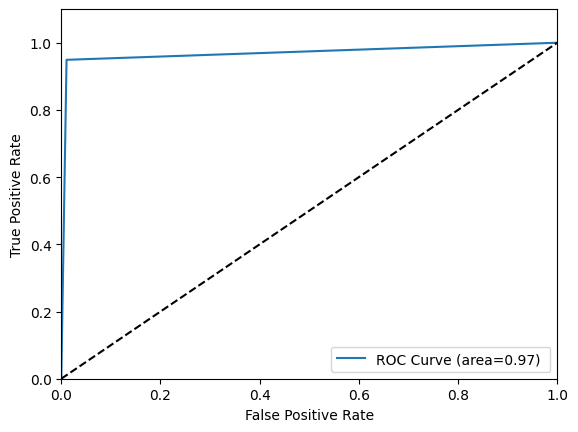

In [ ]:
plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Pass user data manually to check the model's status prediction

user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred = model.predict(user_data)
if y_pred[0] == 1:
    print('Won')
else:
    print('Lose')

Won


In [ ]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred = model.predict(user_data)
if y_pred[0] == 1:
    print('Won')
else:
    print('Lose')


Lose


In [ ]:
#save the model using the pickle

with open("classification_model.pkl","wb") as f:
    pickle.dump(model,f)


In [ ]:
df_reg.tail(2)

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020


In [ ]:
#load the model and check prediction
with open('/content/drive/MyDrive/Copper_project/classification_model.pkl','rb') as f:
  l_model = pickle.load(f)
user_data = np.array([[25.0,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020]])
y_p = l_model.predict(user_data)
#if y_p[0] == 1:
 #   print('Won')
#else:
 #   print('Lose')
y_p[0]

1

### **Regression Algorithm to Predict Selling Price**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df_final = pd.read_csv('https://github.com/r-nirmala/Industrial-Copper-Modeling/raw/main/Data/Copper_data_final')
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [ ]:
df_reg = df_final.copy()

In [ ]:
df_reg.head(3)

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021


In [ ]:
#find the best algorithm by checking r2_score for train and test data
def ML_regression(df, algorithm):
  x = df.drop(columns=['selling_price_log'],axis=1)
  y = df['selling_price_log']

  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
  model = algorithm().fit(x_train, y_train)

  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)

  r2_train = r2_score(y_train,y_pred_train)
  r2_test = r2_score(y_test,y_pred_test)

  accuracy_metrics = {
            'algorithm': algorithm.__name__,
            'R2_train': r2_train,
            'R2_test': r2_test}
  return accuracy_metrics

In [ ]:
print(ML_regression(df_reg, DecisionTreeRegressor))
print(ML_regression(df_reg, ExtraTreesRegressor))
print(ML_regression(df_reg, RandomForestRegressor))
print(ML_regression(df_reg, AdaBoostRegressor))
print(ML_regression(df_reg, GradientBoostingRegressor))
print(ML_regression(df_reg, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999206991163908, 'R2_test': 0.9264754141365177}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999206991163908, 'R2_test': 0.9549070612482128}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9940037469894693, 'R2_test': 0.9571960395881657}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.657531209695044, 'R2_test': 0.6552903550160519}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8870441534401166, 'R2_test': 0.8873405951431543}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9518270798126977, 'R2_test': 0.9461998638404948}


In [ ]:
#RandomForest algorithm has good testing accuracy than others.
#But, Training accuracy is overfitting.

In [ ]:
#Reduce overfitting by hyperparameter tuning with GridSearchCV.
x = df_reg.drop(columns=['selling_price_log'], axis=1)
y = df_reg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

parameters = {'max_depth'      : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
grid_search_r.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid_search_r.best_score_

0.9532636090057878

In [ ]:
#pass these parameters in algorithm and check accuracy of r2_score

x = df_reg.drop(columns=['selling_price_log'],axis=1)
y = df_reg['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)


print('R2_train:', r2_train, '\n', 'R2_test:', r2_test)

R2_train: 0.9865427556236637 
 R2_test: 0.956757640276163


In [ ]:
#overfitting in training data is reduced after hyperparameter tuning

In [ ]:
#Use the hypertuned parameters and check metrics accuracy for selling price prediction
x = df_reg.drop(columns=['selling_price_log'],axis=1)
y = df_reg['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = { 'R2_score':r2_score,
             'Mean_squared_error':mse,
              'Mean_absolute_error':mae,
              'Root_mean_squared_error':rmse }

metrics_r


{'R2_score': 0.9562674373870812,
 'Mean_squared_error': 0.002879487223768938,
 'Mean_absolute_error': 0.03242668818939165,
 'Root_mean_squared_error': 0.053660853736862385}

In [ ]:
df_reg.head(3)

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021


In [ ]:
#Predict selling price by passing user input
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = model.predict(user_data)
y_pred


array([6.8831918])

In [ ]:
# using Inverse Log Transformation(exp) to convert the log value to original scale of the data
np.exp(y_pred[0])

975.7357470516725

In [ ]:
#Save the model in pickle
with open('Regression_model.pkl', 'wb') as f:
  pickle.dump(model, f)


In [ ]:
#load the pickle model to check selling price prediction
with open('/content/Regression_model.pkl', 'rb')as f:
  model = pickle.load(f)
y_pred = model.predict(np.array([[28.0,1,5.0,10.0,1950.0,640665,2.798297,17.221905,1.481605,18,3,2021,1,8,2021]]))
print("Price with log:",y_pred[0])
print("Price without log:",np.exp(y_pred[0]))


Price with log: 6.75364711246864
Price without log: 857.179297900684


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


**Streamlit part**

In [ ]:
#Find the unique values and min, max of columns for setting user input options in streamlit

In [ ]:
a = df_reg['country'].unique()
a.sort()
a

array([ 25.,  26.,  27.,  28.,  30.,  32.,  38.,  39.,  40.,  77.,  78.,
        79.,  80.,  84.,  89., 107., 113.])

In [ ]:
b = df_reg['application'].unique()
b.sort()
b

array([ 2. ,  3. ,  4. ,  5. , 10. , 15. , 19. , 20. , 22. , 25. , 26. ,
       27. , 28. , 29. , 38. , 39. , 40. , 41. , 42. , 56. , 58. , 59. ,
       65. , 66. , 67. , 68. , 69. , 70. , 79. , 87.5])

In [ ]:
c = df_reg['product_ref'].unique()
c.sort()
c

array([    611728,     611733,     611993,     628112,     628117,
           628377,     640400,     640405,     640665,  164141591,
        164336407,  164337175,  929423819, 1282007633, 1332077137,
       1665572032, 1665572374, 1665584320, 1665584642, 1665584662,
       1668701376, 1668701698, 1668701718, 1668701725, 1670798778,
       1671863738, 1671876026, 1690738206, 1690738219, 1693867550,
       1693867563, 1721130331, 1722207579])

In [ ]:
df_reg['thickness_log'].min()

-1.7147984280919266

In [ ]:
df_reg['thickness_log'].max()

3.281543137578373

In [ ]:
df_reg['width'].min()

700.0

In [ ]:
df_reg['width'].max()

1980.0

In [ ]:
df_reg['customer_log'].min()

17.21910565821408

In [ ]:
df_reg['customer_log'].max()

17.230155364880137

In [ ]:
df_reg['quantity_tons_log'].min()

-0.3223343794492468

In [ ]:
df_reg['quantity_tons_log'].max()

6.9247343237411325

In [ ]:
df_reg['selling_price_log'].min()

5.975037794839269

In [ ]:
df_reg['selling_price_log'].max()

7.390361168943161

In [ ]:
df_final['delivery_date'] = pd.to_datetime(
    {
        'year': df_final['delivery_date_year'],
        'month': df_final['delivery_date_month'],
        'day': df_final['delivery_date_day']
    }
)
df_final['delivery_date'].min()

Timestamp('2020-08-01 00:00:00')

In [ ]:
df_final['delivery_date'].max()

Timestamp('2022-01-01 00:00:00')

In [ ]:
df_final['item_date'] = pd.to_datetime(
    {
        'year': df_final['item_date_year'],
        'month': df_final['item_date_month'],
        'day': df_final['item_date_day']
    }
)
df_final['item_date'].min()

Timestamp('2020-07-02 00:00:00')

In [ ]:
df_final['item_date'].max()

Timestamp('2021-04-01 00:00:00')

In [ ]:
pip install streamlit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Copper_project/Regression_model.pkl'

# Load the file
import pickle

with open(file_path, 'rb') as file:
    model = pickle.load(file)

# Use the loaded model (example)
print(model)

Mounted at /content/drive
RandomForestRegressor(max_depth=20, max_features=None)


In [ ]:
%%writefile copper.py



import streamlit as st
import numpy as np
from datetime import date
import pickle

#page configuration
st.set_page_config(page_title='Industrial Copper Modeling')

st.markdown(f'<h2 style="text-align: center;">Industrial Copper Modeling</h2>',
                unsafe_allow_html=True)

#button style and text style functions
def style_submit_button():

  st.markdown("""
                  <style>
                  div.stButton > button:first-child {
                                                      background-color: #367F89;
                                                      color: white;
                                                      width: 70%}
                  </style>
              """, unsafe_allow_html=True)


def style_prediction():

  st.markdown(
          """
          <style>
          .center-text {
              text-align: center;
              color: violet
          }
          </style>
          """,
          unsafe_allow_html=True
      )

#user input options
class options:

    country_values = [25.0, 26.0, 27.0, 28.0, 30.0, 32.0, 38.0, 39.0, 40.0, 77.0, 78.0,
                       79.0, 80.0, 84.0, 89.0, 107.0, 113.0]

    status_values = ['Won', 'Lost', 'Draft', 'To be approved', 'Not lost for AM',
                    'Wonderful', 'Revised', 'Offered', 'Offerable']

    status_dict = {'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8}

    item_type_values = ['W', 'WI', 'S', 'PL', 'IPL', 'SLAWR', 'Others']

    item_type_dict = {'W':5.0, 'WI':6.0, 'S':3.0, 'Others':1.0, 'PL':2.0, 'IPL':0.0, 'SLAWR':4.0}

    application_values = [2.0, 3.0, 4.0, 5.0, 10.0, 15.0, 19.0, 20.0, 22.0, 25.0,26.0,
                          27.0, 28.0, 29.0, 38.0, 39.0, 40.0, 41.0, 42.0, 56.0, 58.0, 59.0,
                          65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 79.0, 87.5]

    product_ref_values = [611728, 611733, 611993, 628112, 628117, 628377, 640400, 640405,640665,164141591,
                          164336407, 164337175, 929423819, 1282007633, 1332077137, 1665572032, 1665572374,
                          1665584320, 1665584642, 1665584662, 1668701376, 1668701698, 1668701718, 1668701725,
                          1670798778, 1671863738, 1671876026, 1690738206, 1690738219, 1693867550,
                          1693867563, 1721130331, 1722207579]

#function for regression and classification
class prediction:

    def regression():

        with st.form('Regression'):

            col1,col2,col3 = st.columns([0.5,0.1,0.5])

            with col1:

                item_date = st.date_input(label='Item Date', min_value=date(2020,2,7),
                                        max_value=date(2021,4,1), value=date(2020,2,7))

                quantity_log = st.text_input(label='Quantity Tons (Min: -0.3223 & Max: 6.9247)')

                country = st.selectbox(label='Country', options=options.country_values)

                item_type = st.selectbox(label='Item Type', options=options.item_type_values)

                thickness_log = st.text_input(label='Thickness (Min: -1.7147 & Max: 3.2815)')

                product_ref = st.selectbox(label='Product Ref', options=options.product_ref_values)


            with col3:

                delivery_date = st.date_input(label='Delivery Date', min_value=date(2020,8,1),
                                            max_value=date(2022,1,1), value=date(2020,8,1))

                customer = st.text_input(label='Customer (Min: 17.2191 & Max: 17.2301)')

                status = st.selectbox(label='Status', options=options.status_values)

                application = st.selectbox(label='Application', options=options.application_values)

                width = st.text_input(label='Width (Min: 700.0 & Max: 1980.0)')

                st.write('')
                st.write('')
                button = st.form_submit_button(label='SUBMIT')
                style_submit_button()

        if button:
            with open(r'/content/drive/MyDrive/Copper_project/Regression_model.pkl', 'rb') as f:
                model = pickle.load(f)

            user_data = np.array([[customer,
                                country,
                                options.status_dict[status],
                                options.item_type_dict[item_type],
                                application,
                                width,
                                product_ref,
                                np.log(float(quantity_log)),
                                np.log(float(thickness_log)),
                                item_date.day, item_date.month, item_date.year,
                                delivery_date.day, delivery_date.month, delivery_date.year]])

            y_pred = model.predict(user_data)
            selling_price = np.exp(y_pred[0])
            selling_price = round(selling_price, 2)
            return selling_price

    def classification():

        with st.form('Classification'):

            col1,col2,col3 = st.columns([0.5,0.1,0.5])

            with col1:

                item_date = st.date_input(label='Item Date', min_value=date(2020,2,7),
                                        max_value=date(2021,4,1), value=date(2020,2,7))

                quantity_log = st.text_input(label='Quantity Tons (Min: -0.3223 & Max: 6.9247)')

                country = st.selectbox(label='Country', options=options.country_values)

                item_type = st.selectbox(label='Item Type', options=options.item_type_values)

                thickness_log = st.text_input(label='Thickness (Min: -1.7147 & Max: 3.2815)')

                product_ref = st.selectbox(label='Product Ref', options=options.product_ref_values)


            with col3:

                delivery_date = st.date_input(label='Delivery Date', min_value=date(2020,8,1),
                                            max_value=date(2022,1,1), value=date(2020,8,1))

                customer = st.text_input(label='Customer (Min: 17.2191 & Max: 17.2301)')

                selling_price_log = st.text_input(label='Selling Price (Min: 5.9750 & Max: 7.3903)')

                application = st.selectbox(label='Application', options=options.application_values)

                width = st.text_input(label='Width (Min: 700.0 & Max: 1980.0)')

                st.write('')
                st.write('')
                button = st.form_submit_button(label='SUBMIT')
                style_submit_button()

        if button:

            with open(r'/content/drive/MyDrive/Copper_project/classification_model.pkl', 'rb') as f:
                model = pickle.load(f)
            user_data = np.array([[customer,
                                country,
                                options.item_type_dict[item_type],
                                application,
                                width,
                                product_ref,
                                np.log(float(quantity_log)),
                                np.log(float(thickness_log)),
                                np.log(float(selling_price_log)),
                                item_date.day, item_date.month, item_date.year,
                                delivery_date.day, delivery_date.month, delivery_date.year]])

            y_pred = model.predict(user_data)
            status = y_pred[0]
            return status

#main streamlit page
tab1, tab2 = st.tabs(['PREDICT SELLING PRICE', 'PREDICT STATUS'])

with tab1:

    try:
        selling_price = prediction.regression()
        if selling_price:
            style_prediction()
            st.markdown(f'### <div class="center-text">Predicted Selling Price = {selling_price}</div>', unsafe_allow_html=True)

    except ValueError:
        col1,col2,col3 = st.columns([0.26,0.55,0.26])
        with col2:
            st.warning('##### Quantity Tons / Customer ID is empty')

with tab2:

    try:
        status = prediction.classification()
        if status == 1:
            style_prediction()
            st.markdown(f'### <div class="center-text">Predicted Status = Won</div>', unsafe_allow_html=True)

        elif status == 0:
            style_prediction()
            st.markdown(f'### <div class="center-text">Predicted Status = Lost</div>', unsafe_allow_html=True)

    except ValueError:

        col1,col2,col3 = st.columns([0.15,0.70,0.15])

        with col2:
            st.warning('##### Quantity Tons / Customer ID is empty')








Overwriting copper.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.145.105.173


In [ ]:
! streamlit run copper.py & npx localtunnel --port 8501